In [6]:
import pandas as pd
import numpy as np
### Visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
### To ignore warnings
import warnings
warnings.filterwarnings('ignore')
### Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, fbeta_score
### To be able to see maximum columns on screen
pd.set_option('display.max_columns', 500)

# Data Definition
The datasets consist of several medical predictor (independent) variables and one target (dependent) variable, Outcome. 
Independent variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

The following features have been provided to help us predict whether a person is diabetic or not:

Pregnancies: Number of times pregnant

Glucose: Plasma glucose concentration over 2 hours in an oral glucose tolerance test

BloodPressure: Diastolic blood pressure (mm Hg)

SkinThickness: Triceps skin fold thickness (mm)   (Triceps skinfold (TSF) thickness is an economical and convenient measurement to assess trunk and overall obesity)


Insulin: 2-Hour serum insulin (mu U/ml)

BMI: Body mass index (weight in kg/(height in m)2)

DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes based on family history)

Age: Age (years)

Outcome: Class variable (0 if non-diabetic, 1 if diabetic)


In [11]:

dataset=pd.read_csv("./diabetes.csv")

In [13]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
dataset.shape

(768, 9)

In [16]:
dataset.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [20]:
#about count means std 25% 50% 75% max data info
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [21]:
#info about dataset 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [22]:
#how many nulls and there replacement
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [26]:
for i in dataset.columns:
    print(f'feature {i} have unique value count {dataset[i].nunique()}')

feature Pregnancies have unique value count 17
feature Glucose have unique value count 136
feature BloodPressure have unique value count 47
feature SkinThickness have unique value count 51
feature Insulin have unique value count 186
feature BMI have unique value count 248
feature DiabetesPedigreeFunction have unique value count 517
feature Age have unique value count 52
feature Outcome have unique value count 2


# 2.0 Graphical Analysis
2.1 Checking Distribution of features

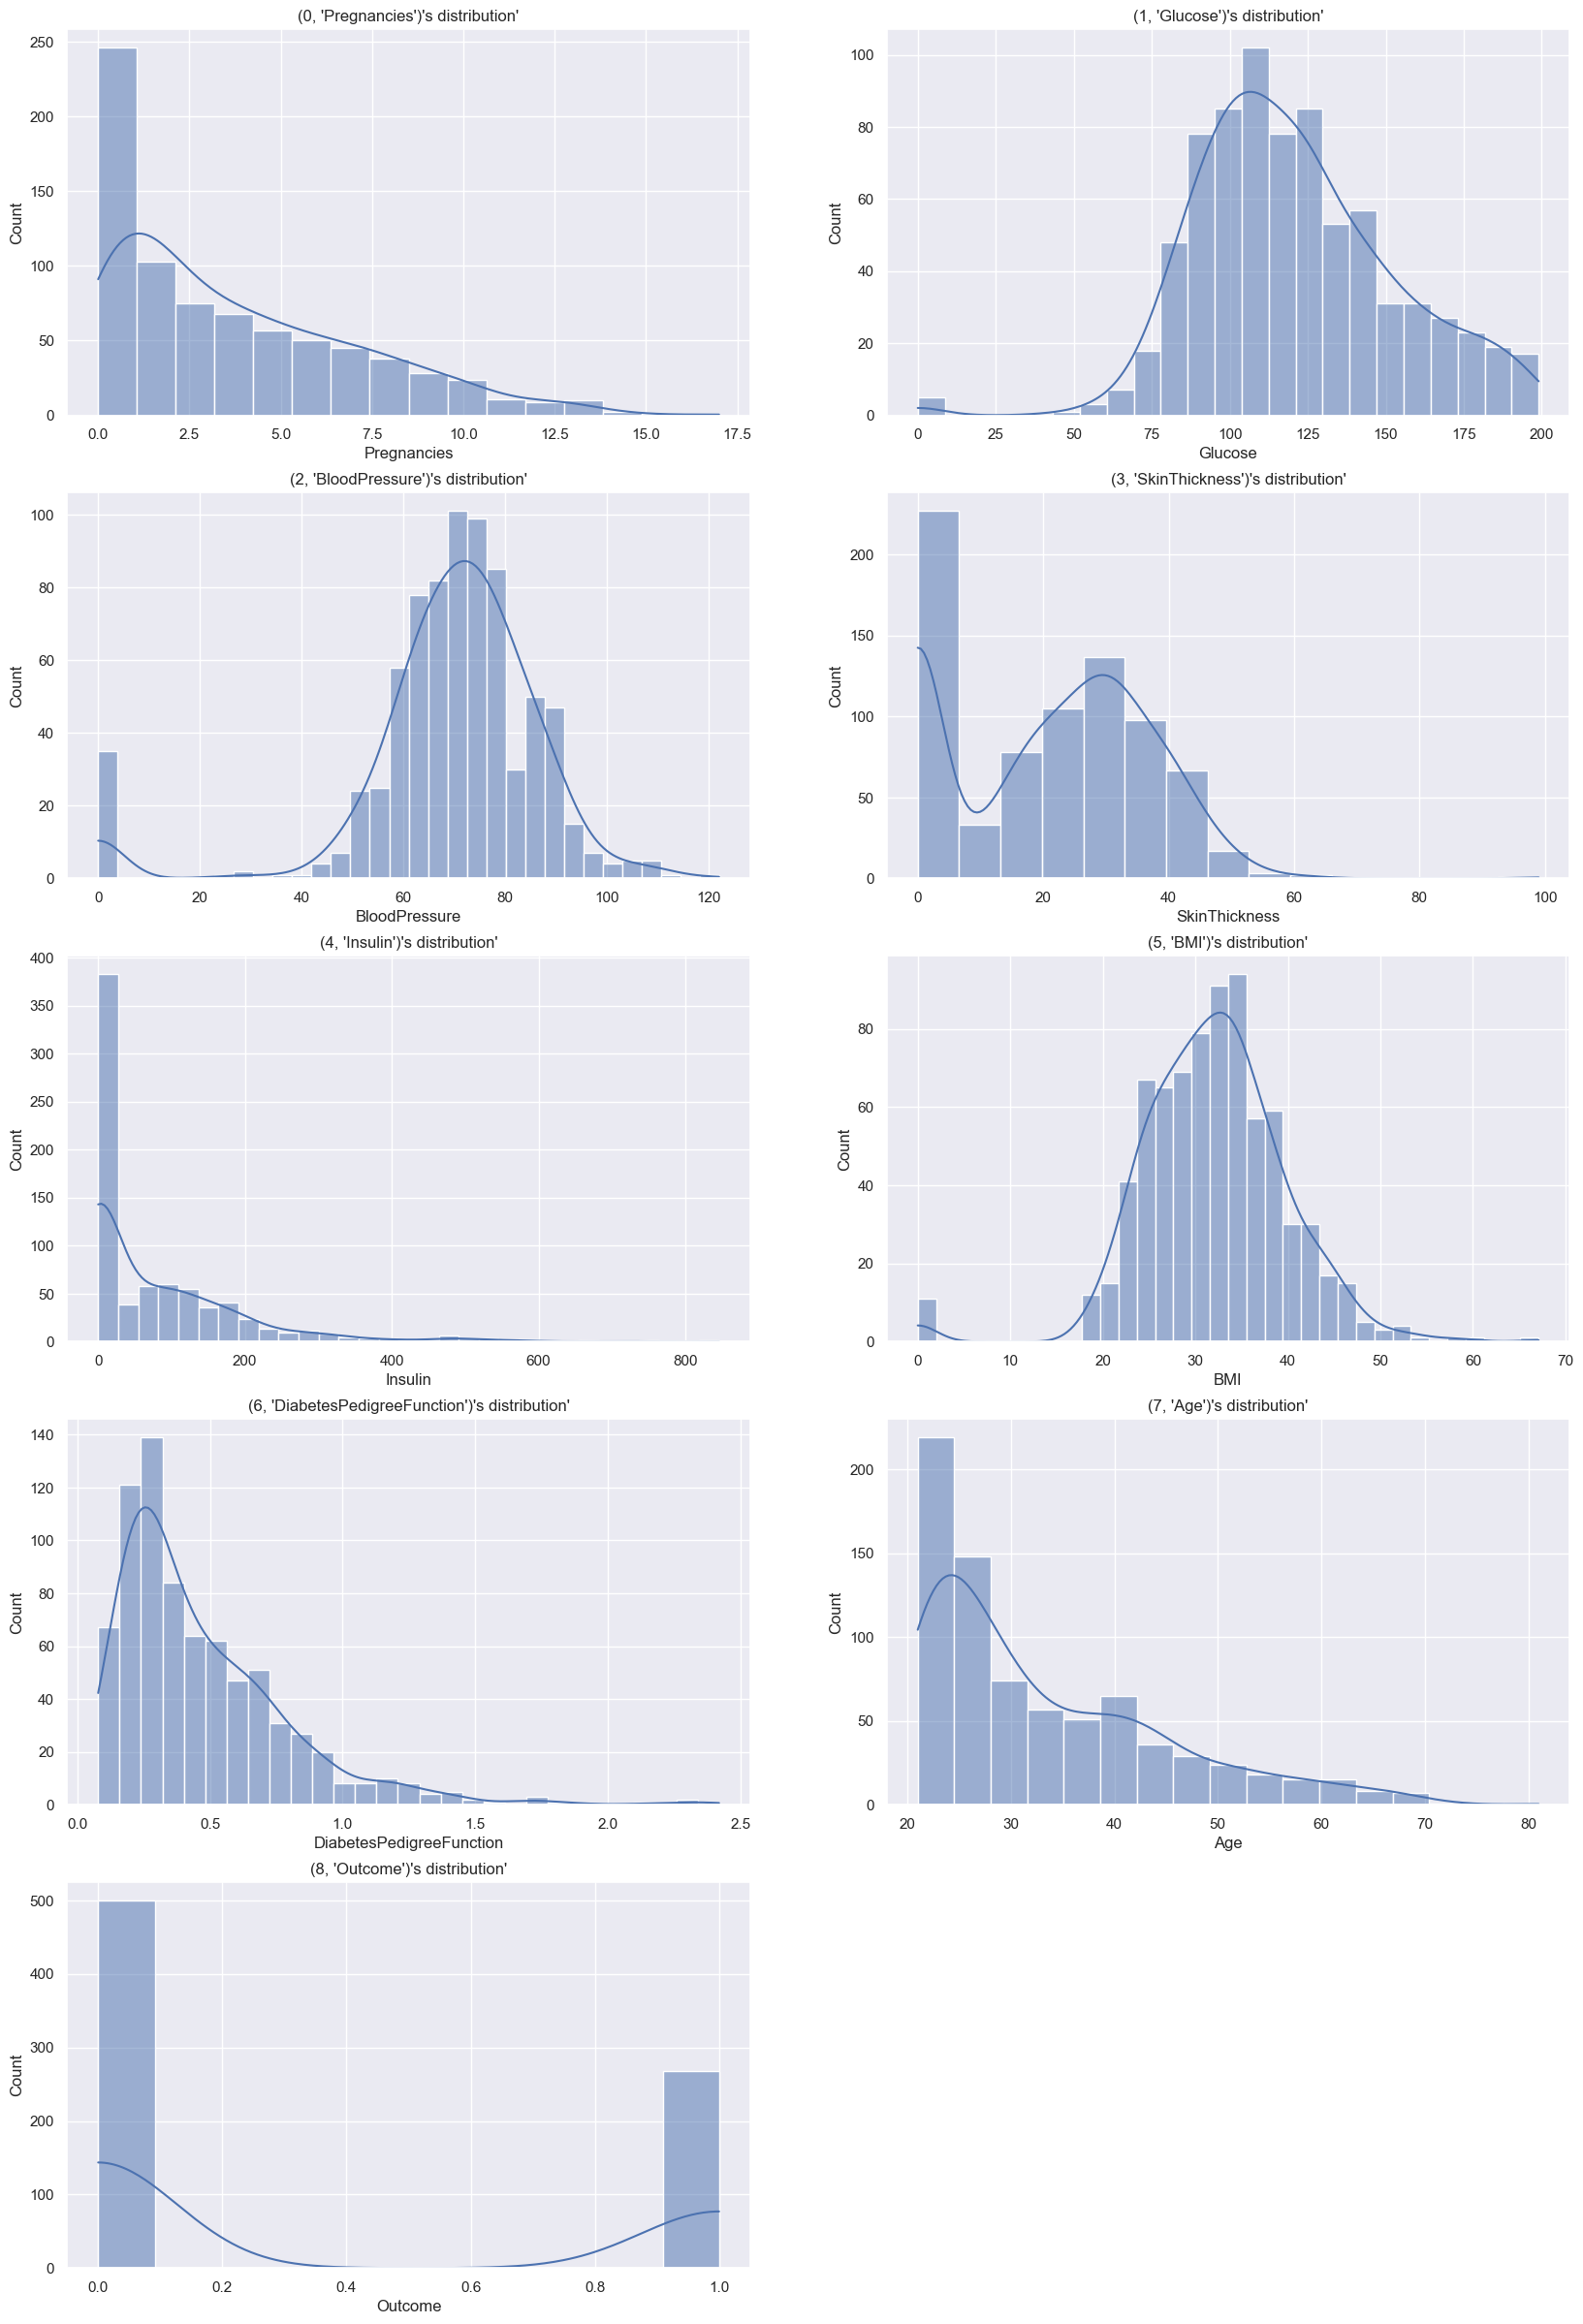

In [33]:
plt.figure(figsize=(20,30))
for i in enumerate(dataset.columns): 
 plt.subplot(5, 2, i[0]+1)
 sns.set(rc={'figure.figsize':(7,5)})
 sns.histplot(data=dataset, x=i[1], kde=True)
 plt.title(f"{i}'s distribution'")

Skewness is a measure of the asymmetry of a distribution.

A distribution is asymmetrical when its left and right side are not mirror images.

A distribution can have right (or positive), left (or negative), or zero skewness.

A right-skewed distribution is longer on the right side of its peak, and a left-skewed distribution is longer on the left side of its peak:



https://www.scribbr.com/wp-content/uploads/2022/05/Skewness-of-a-distribution-Large.webp

# Observations
Pregnancies has right skewed distribution, this indicates this feature has outliers towards right side of distribution.

Glucose has outliers towards left side of distribution.

BloodPressure has outliers towards left side of distribution.

Insulin has right skewed distribution, this indicates this feature has outliers towards right side of distribution.
    
BMI has outliers towards left side of distribution.
    
DiabetesPedigreeFunction has outliers towards left side of distribution.
    
Age has outliers towards left side of distribution.

8. Features like Glucose, BloodPressure, SkinThickness, Insulin, BMI have lot of zero values so replace these values with its mean.

# 2.2 Replacing zero values with mean and rechecking Distribution of features
Note: In place of mean we can also use median, mode or any random value.

In [38]:
### creating copy of dataset for further analysis so that we can also perform data cleaning on copied dataset.

data=dataset.copy()
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [39]:
for feature in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    data[feature]=data[feature].replace(0,data[feature].mean())

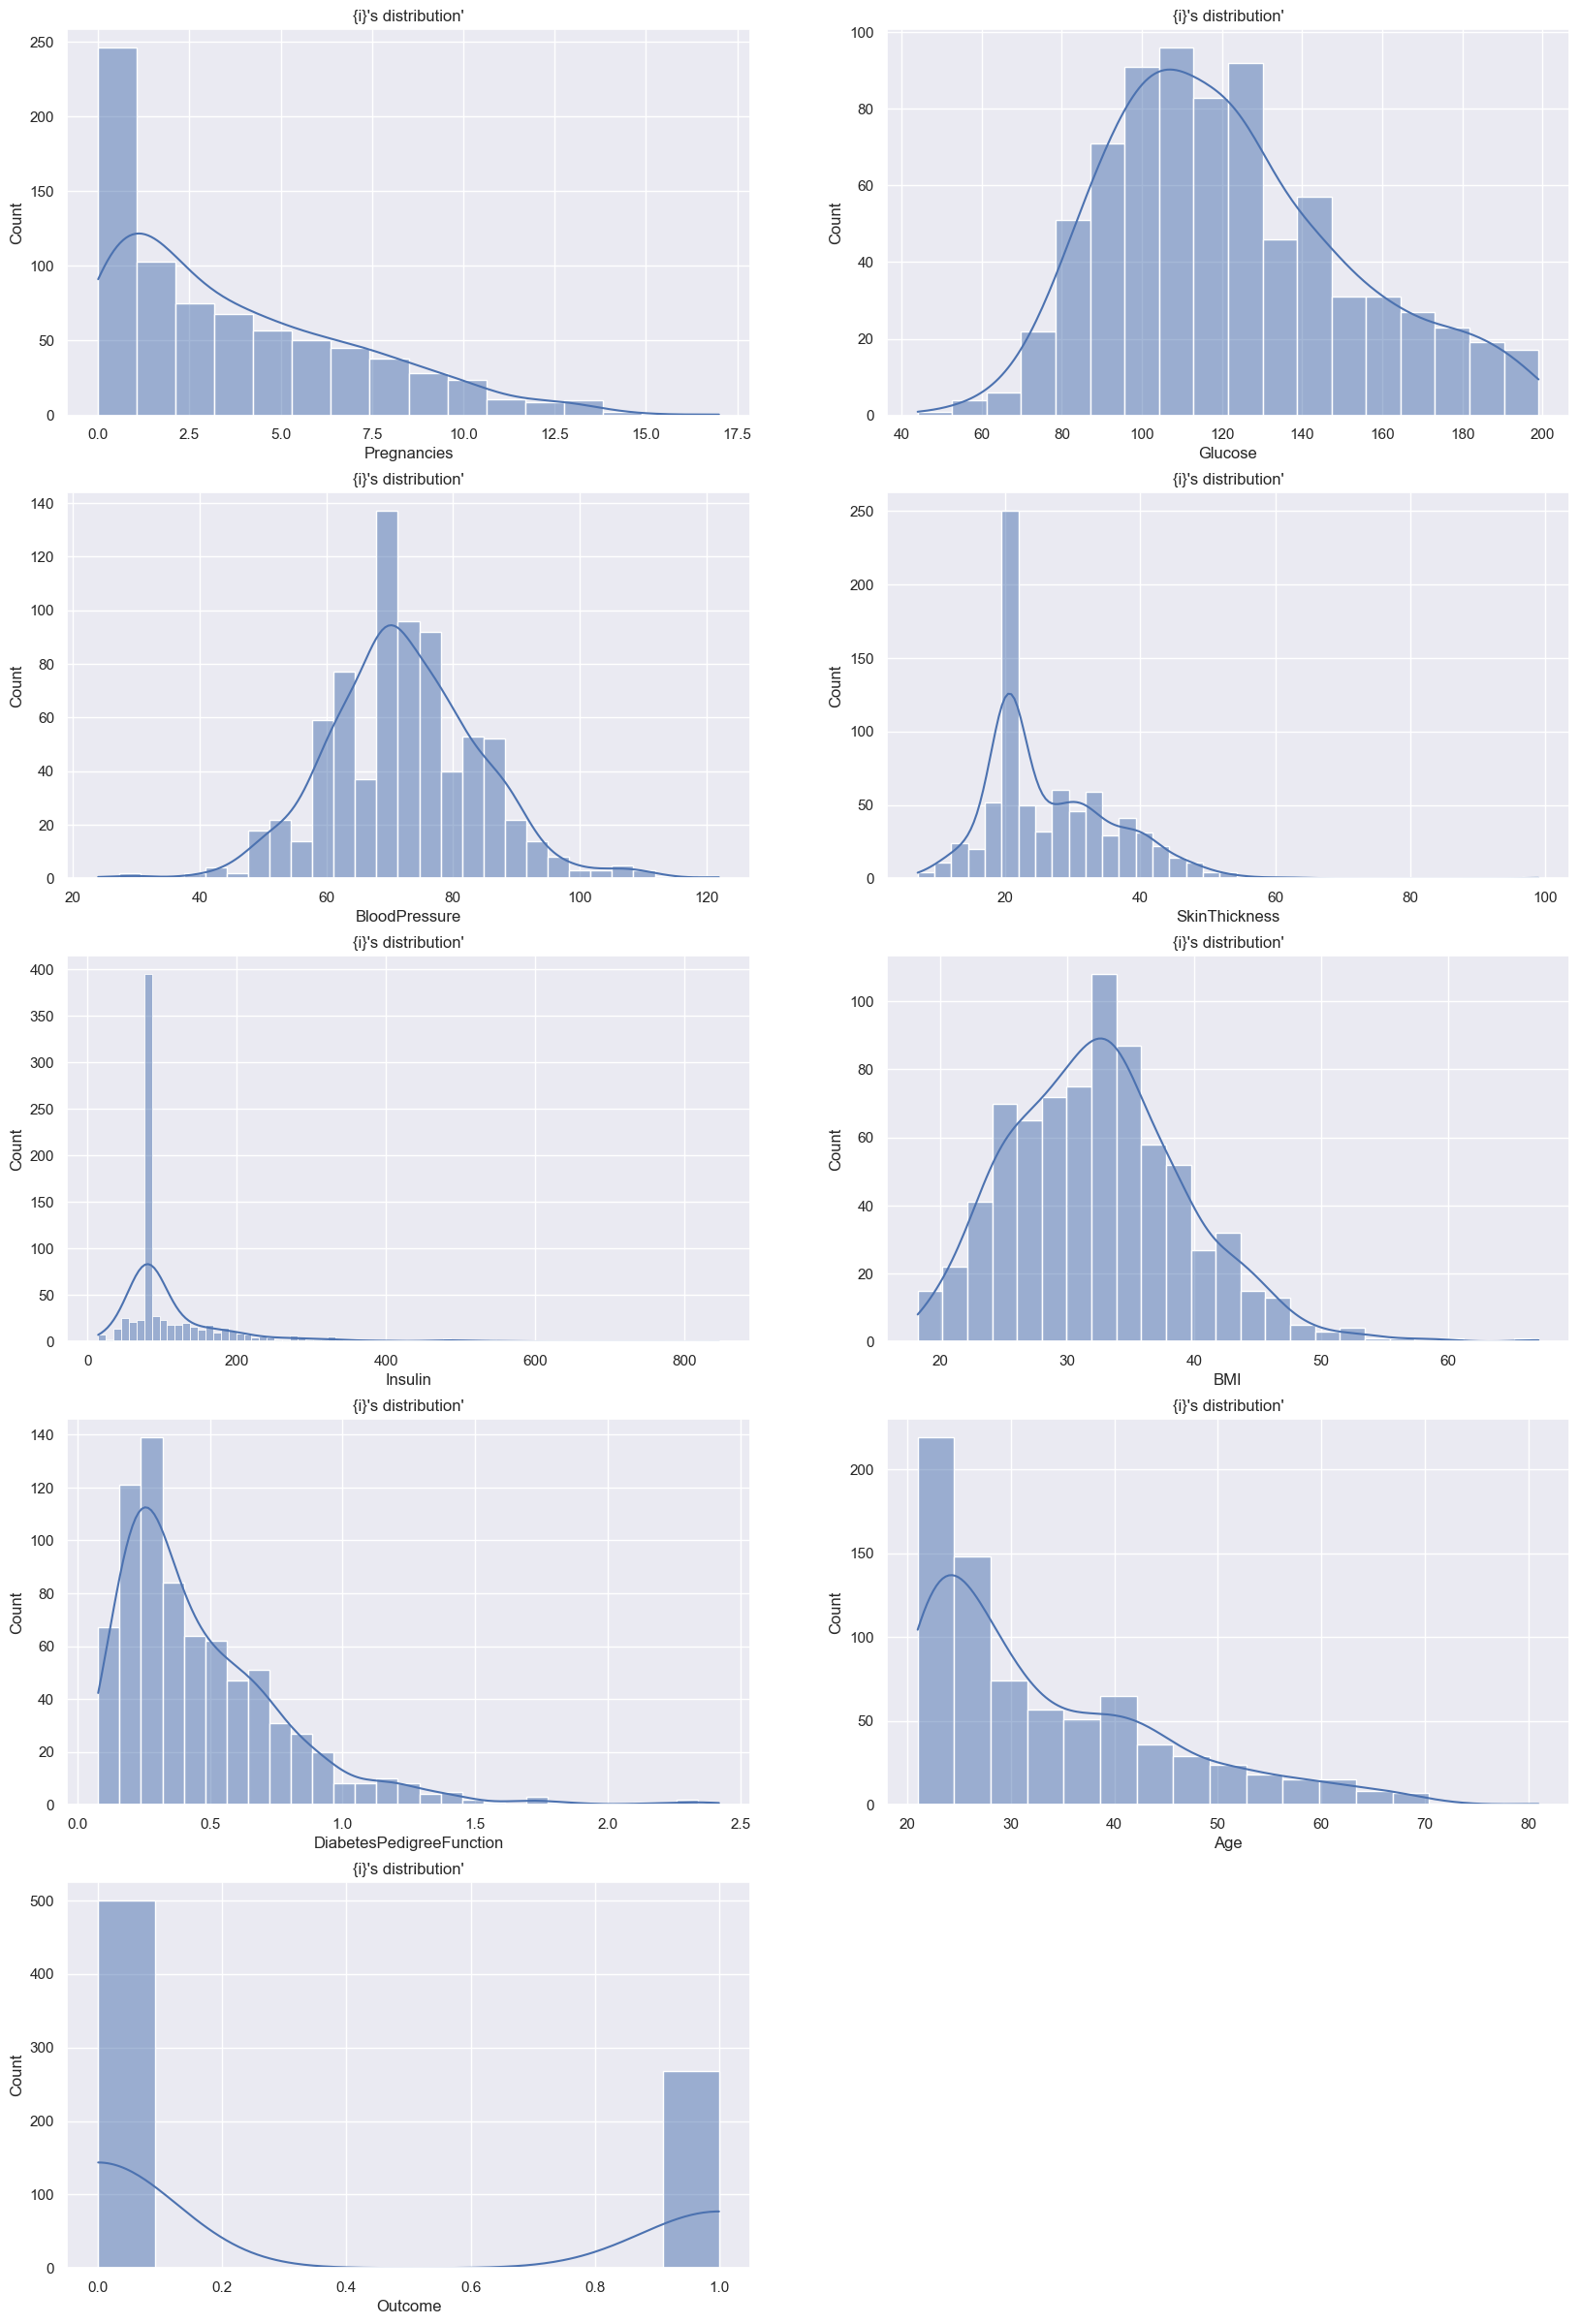

In [42]:
#after repalement of 0 now we are checking the distribution again .
plt.figure(figsize=(20,30))
for i in enumerate(data.columns):
    plt.subplot(5, 2, i[0]+1)
    sns.set(rc={'figure.figsize':(7,5)})
    sns.histplot(data=data, x=i[1], kde=True)
    plt.title("{i}'s distribution'")

# Observations
After replacing zero values with means of these features Glucose, BloodPressure, SkinThickness, Insulin, BMI the distribution skewness managed a little bit.

# 2.3 Checking Outliers in independent features

In [43]:
### Getting independent features
independent_features=[feature for feature in data.columns if feature not in ['Outcome']]
print(independent_features)

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


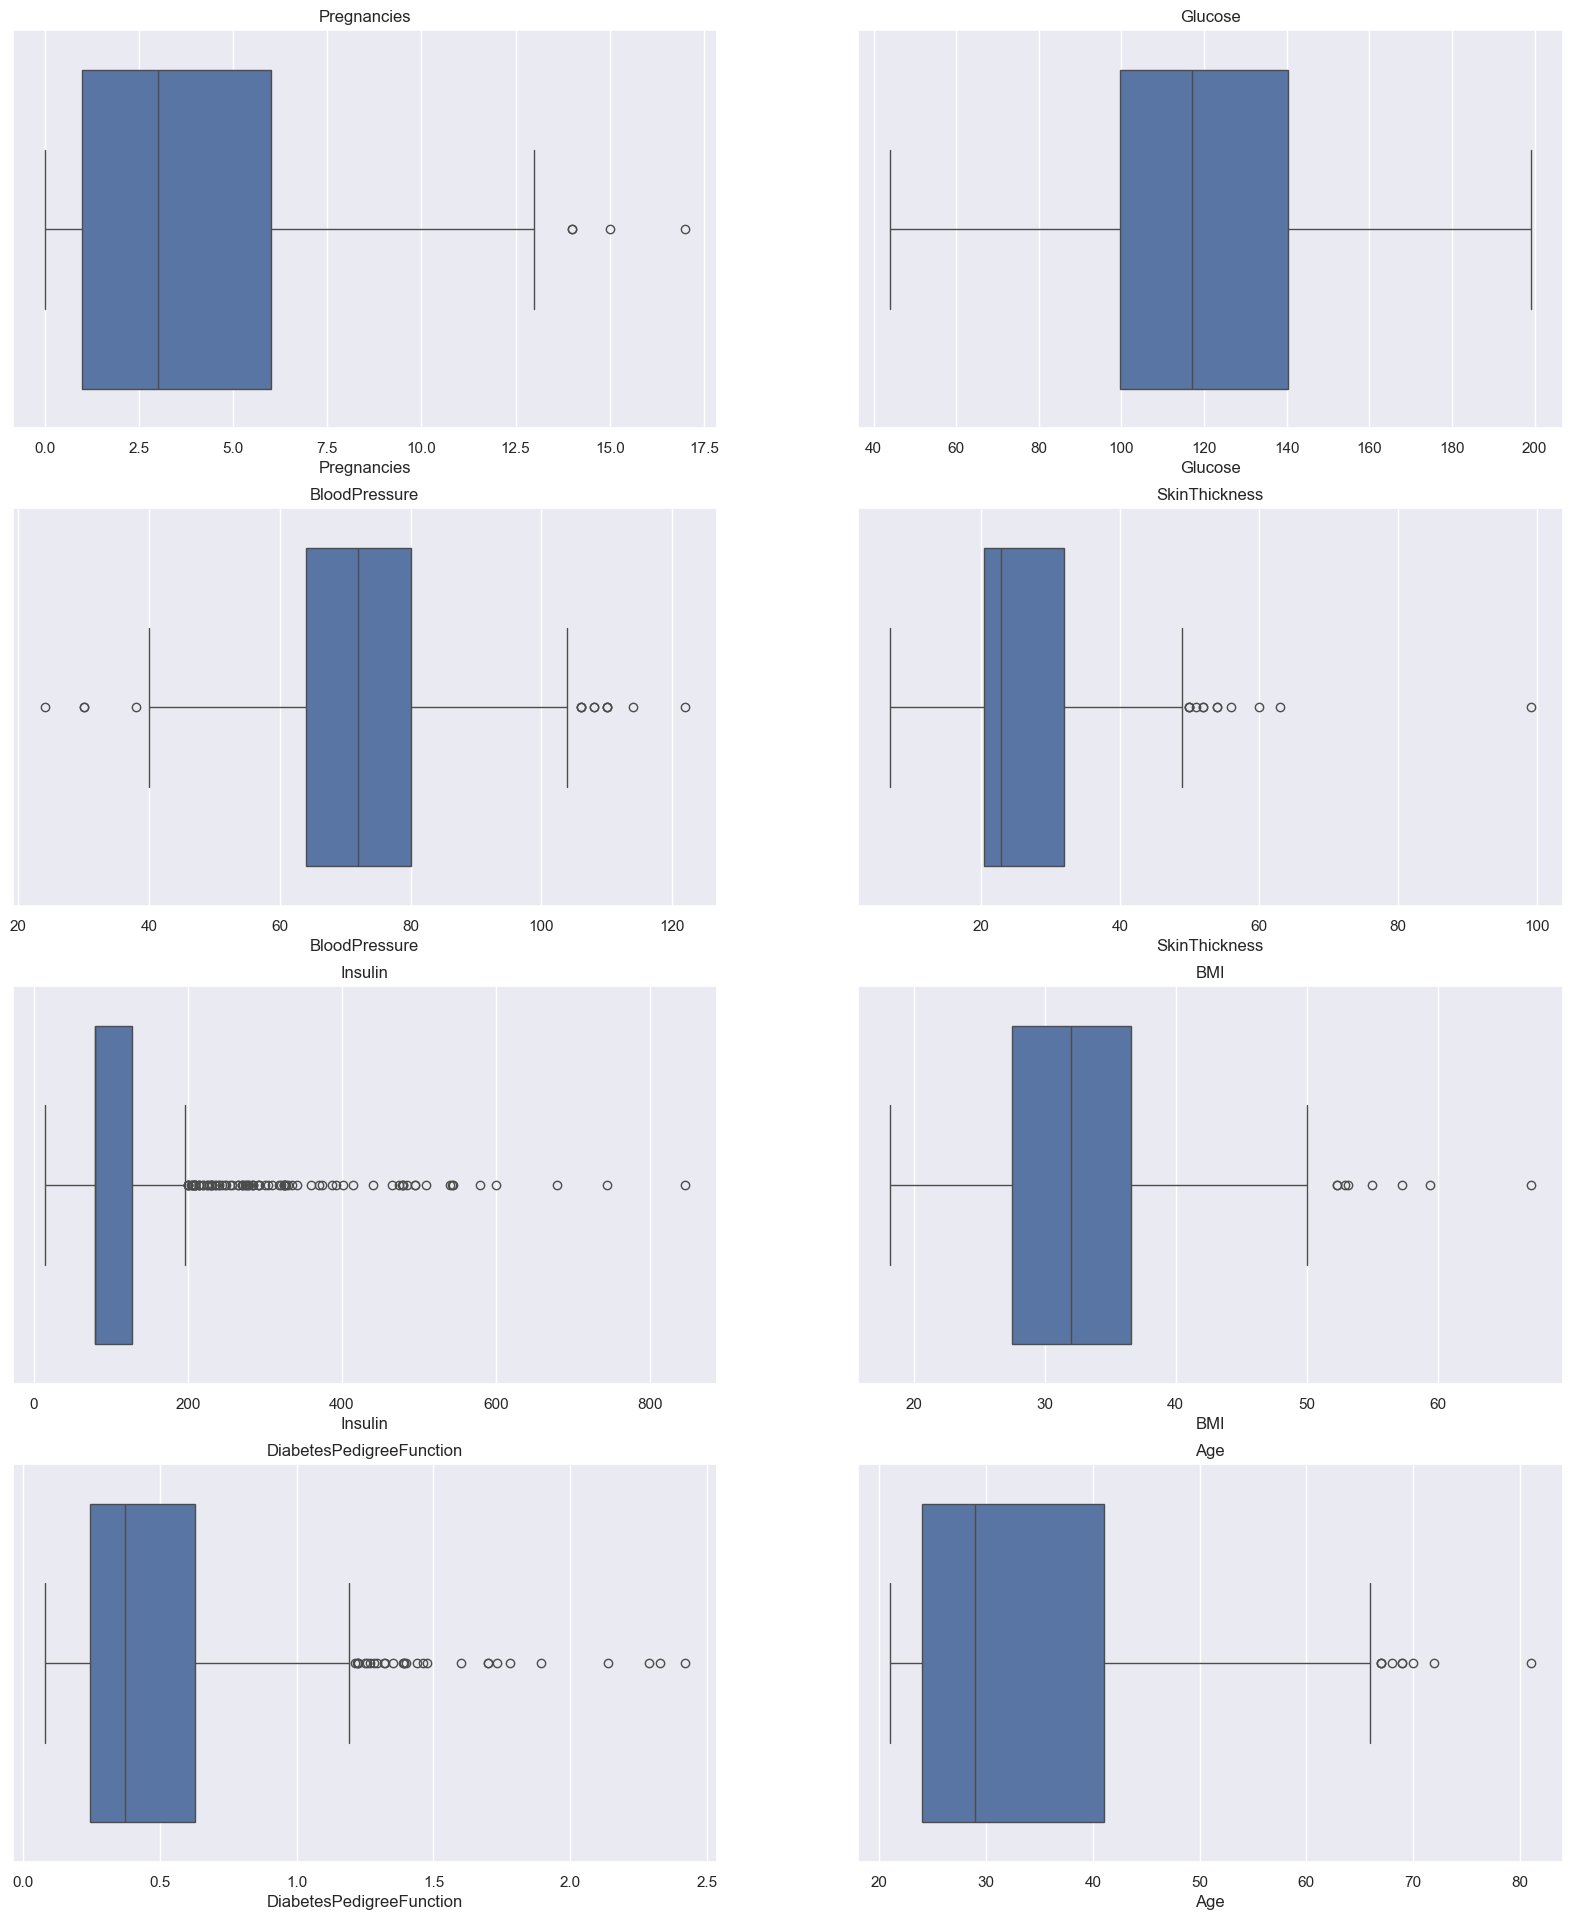

In [50]:
#for checking outlier's we use box plot
plt.figure(figsize=(20,30))
for i in enumerate(independent_features):
    plt.subplot(5, 2, i[0]+1)
    sns.set(rc={'figure.figsize':(7,5)})
    sns.boxplot(data=data, x=i[1])
    plt.title(f"{i[1]}")

#Observations

Note: Some outliers are already handled when we replaced the zreo values with mean.

Glucose has zero outliers.
    
Pregnancies has some outliers on upper boundary side.
    
BloodPressure has outliers on both sides of boundary.
    
SkinThickness, BMI and Age have outliers on upper boundary side.
    
Insulin and DiabetesPedigreeFunction has large no of outliers on upper boundary side.

2.4 Trimming outliers

In [58]:
def outlier_trimmer_upper(data_set, feature, trimming_value):
    """This function takes dataset, feature to be trimmed and the value after which we have to trim the data 
    and returns the dataset after trimming outliers in input feature.
    """
    threshold=data_set[feature].quantile(trimming_value/100)
    data_set=data_set[data_set[feature]<threshold]
    return data_set

def outlier_trimmer_lower(data_set, feature, trimming_value):
    """This function takes dataset, feature to be trimmed and the value after which we have to trim the data 
    and returns the dataset after trimming outliers in input feature.
    """
    threshold=data_set[feature].quantile(trimming_value/100)
    data_set=data_set[data_set[feature]>threshold]
    return data_set

In [59]:
### shape of data before trimming
data.shape

(768, 9)

In [60]:
### removing 1 percent outliers in BloodPressure, SkinThickness, BMI and Age as these feature has less no of outliers

for feature in ['BloodPressure', 'SkinThickness', 'BMI', 'Age']:
    data=outlier_trimmer_upper(data, feature, 99)

In [61]:
### shape of data after trimming
data.shape

(733, 9)

In [62]:
### removing 2 percent outliers in Insulin and DiabetesPedigreeFunction as they have large no of outliers

for feature in ['Insulin', 'DiabetesPedigreeFunction']:
    data=outlier_trimmer_upper(data, feature, 98)

In [63]:
### removing 0.5 percent outliers in BMI, Glucose, BloodPressure on lower side

for feature in ['Glucose', 'BloodPressure', 'BMI' ]:
    data=outlier_trimmer_lower(data, feature, 0.5)

2.5 Re-checking outliers after trimming outliers in independent features

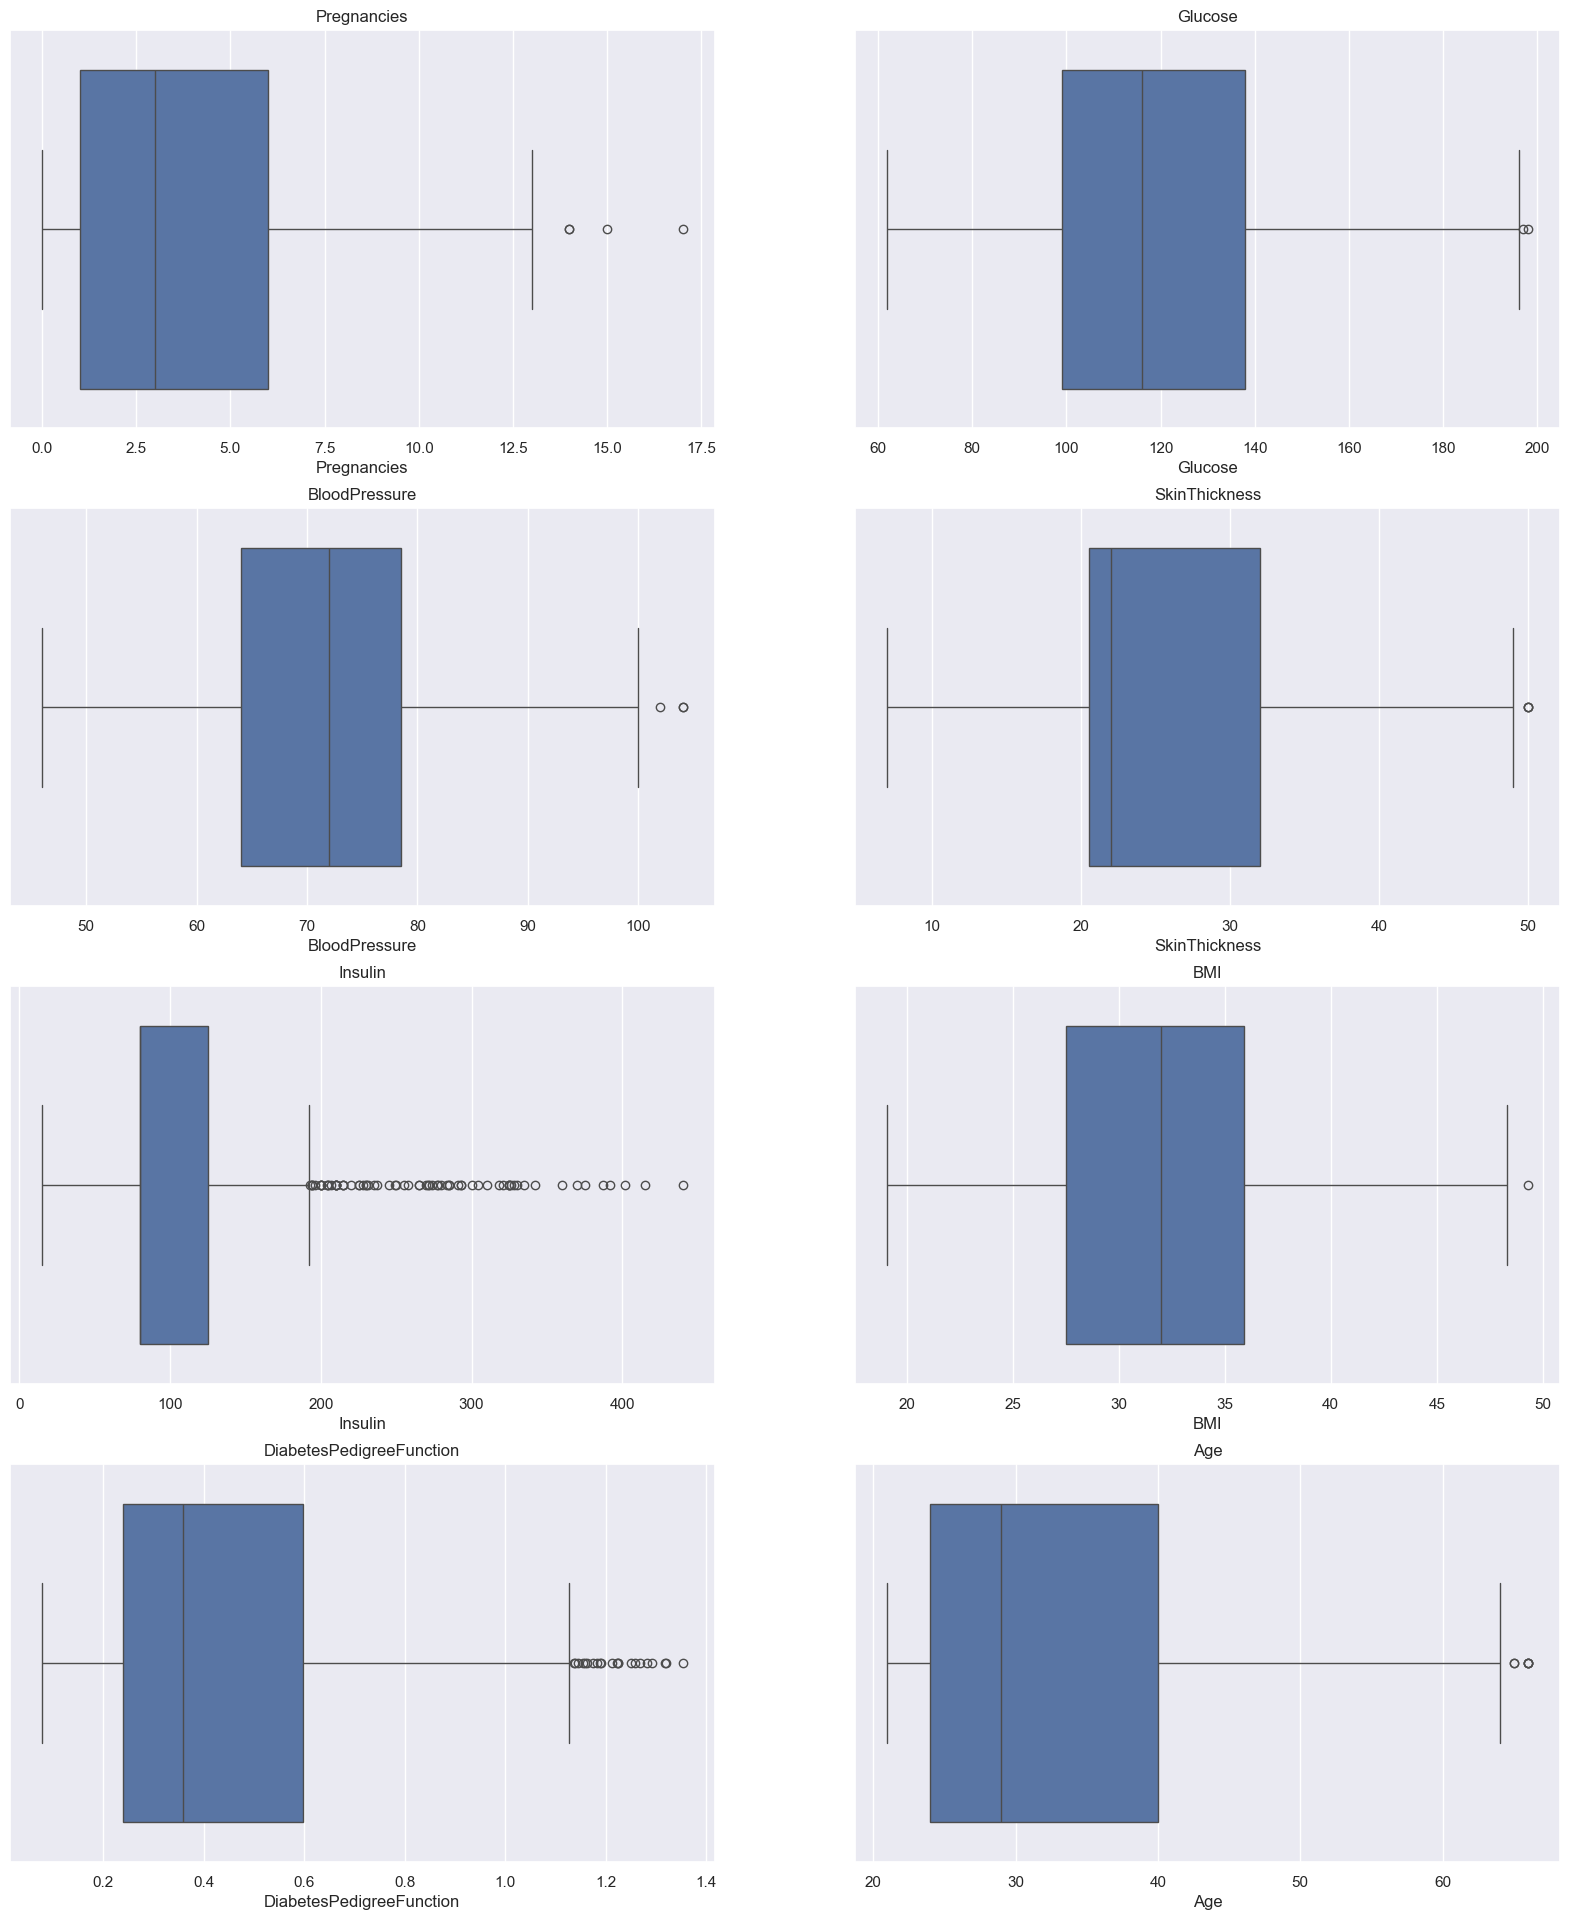

In [64]:
plt.figure(figsize=(20,30))
for i in enumerate(independent_features):
    plt.subplot(5, 2, i[0]+1)
    sns.set(rc={'figure.figsize':(7,5)})
    sns.boxplot(data=data, x=i[1])
    plt.title("{}".format(i[1]))

Observations
After Trimming Outliers

BloodPressure has very few outliers on left sides of boundary now.

SkinThickness has no outliers now.

BMI and Age have very few outliers on upper boundary side now.

No of outliers is reduced for Insulin and DiabetesPedigreeFunction.

Now no feature has outliers on lower side.

Observations
After Trimming Outliers

BloodPressure has very few outliers on left sides of boundary now.

SkinThickness has no outliers now.
BMI and Age have very few outliers on upper boundary side now.

No of outliers is reduced for Insulin and DiabetesPedigreeFunction.

Now no feature has outliers on lower side.

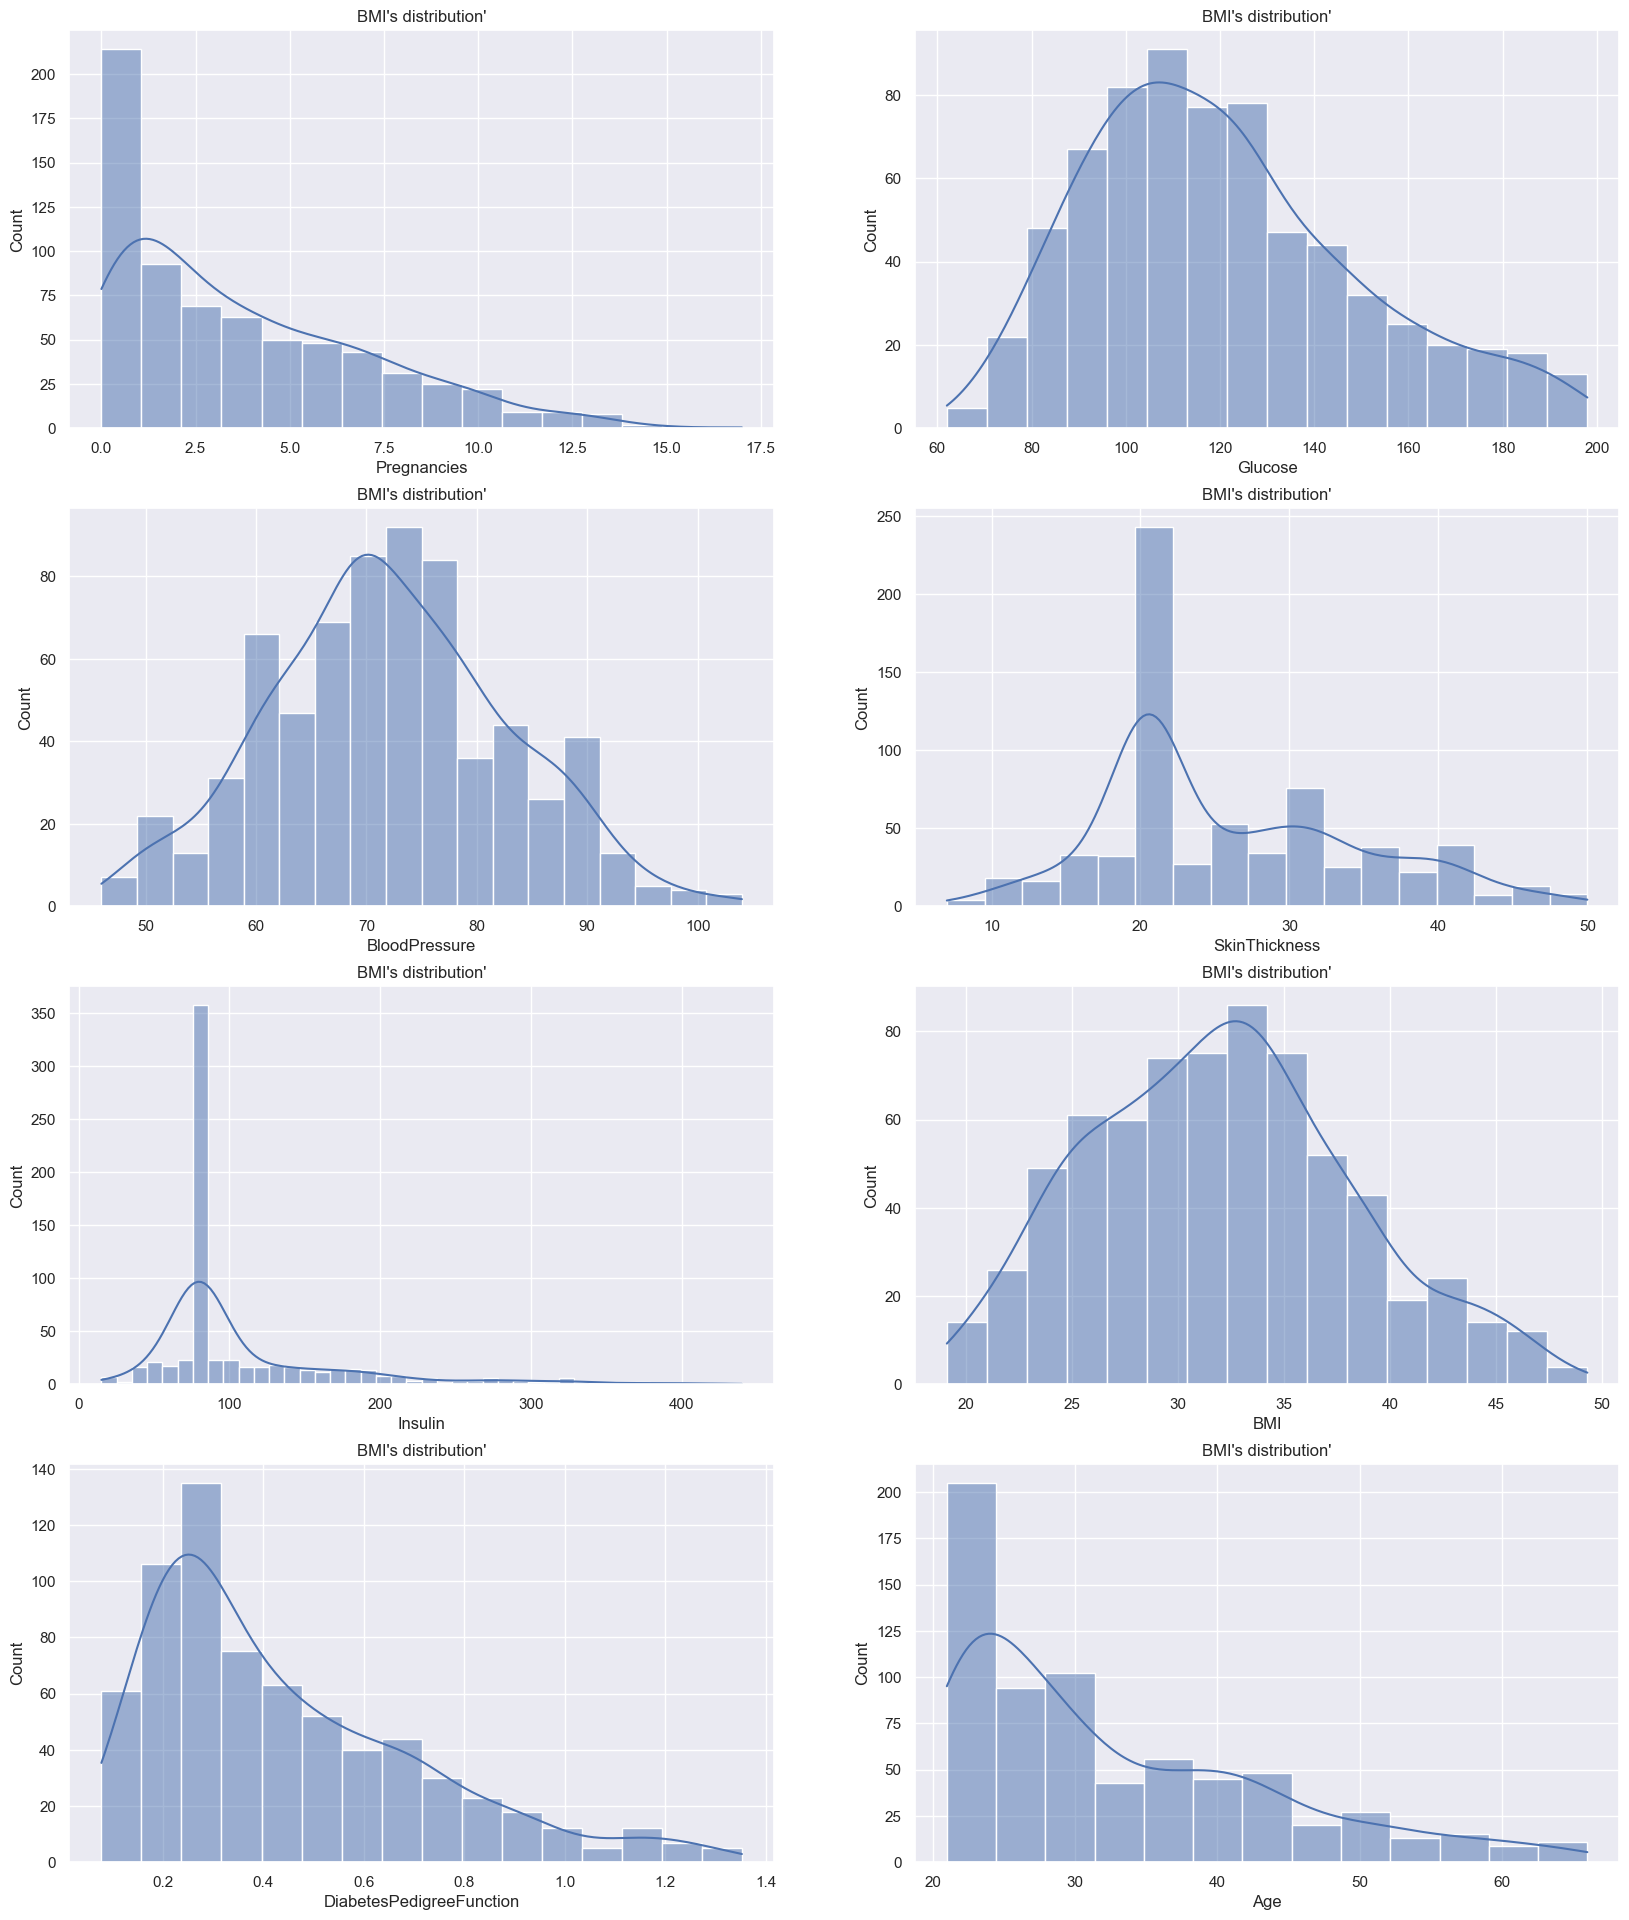

In [65]:
plt.figure(figsize=(20,30))
for i in enumerate(independent_features):
    plt.subplot(5, 2, i[0]+1)
    sns.set(rc={'figure.figsize':(7,5)})
    sns.histplot(data=data, x=i[1], kde=True)
    plt.title("{}'s distribution'".format(feature))

# 2.7 Checking imbalance of data before and after trimming outliers
2.7.1 Before trimming outliers

<Axes: xlabel='Outcome', ylabel='count'>

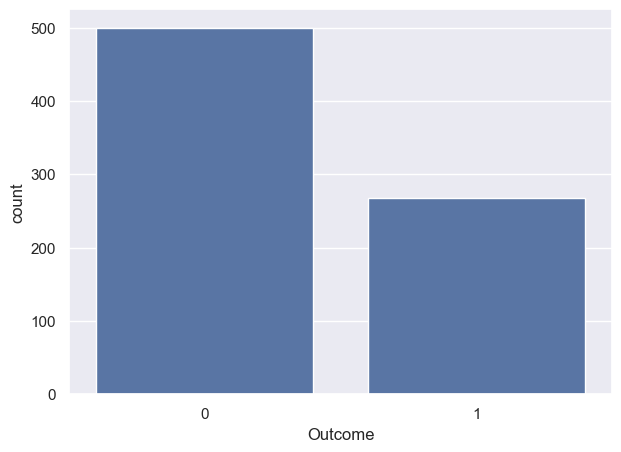

In [67]:
sns.countplot(data=dataset, x='Outcome')

2.7.2 After trimming outliers

<Axes: xlabel='Outcome', ylabel='count'>

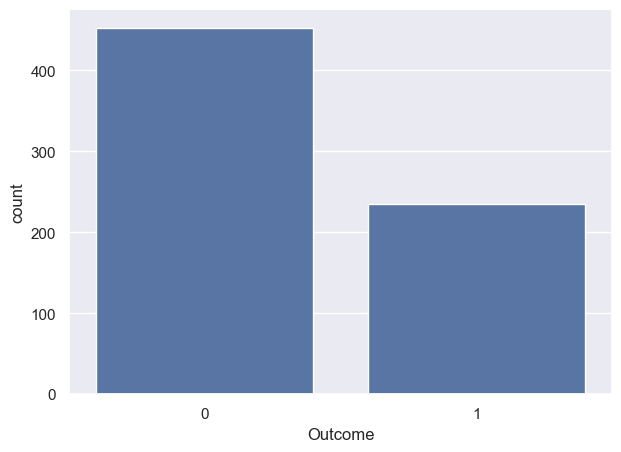

In [69]:
sns.countplot(data=data, x='Outcome')

Observations

We have imbalance in our dataset,

lets not handle this imbalance and check accuracy, precision and recall
Then handle this imbalance and check accuracy, precision and recall

2.8 Relationship between independent features and dependent feature

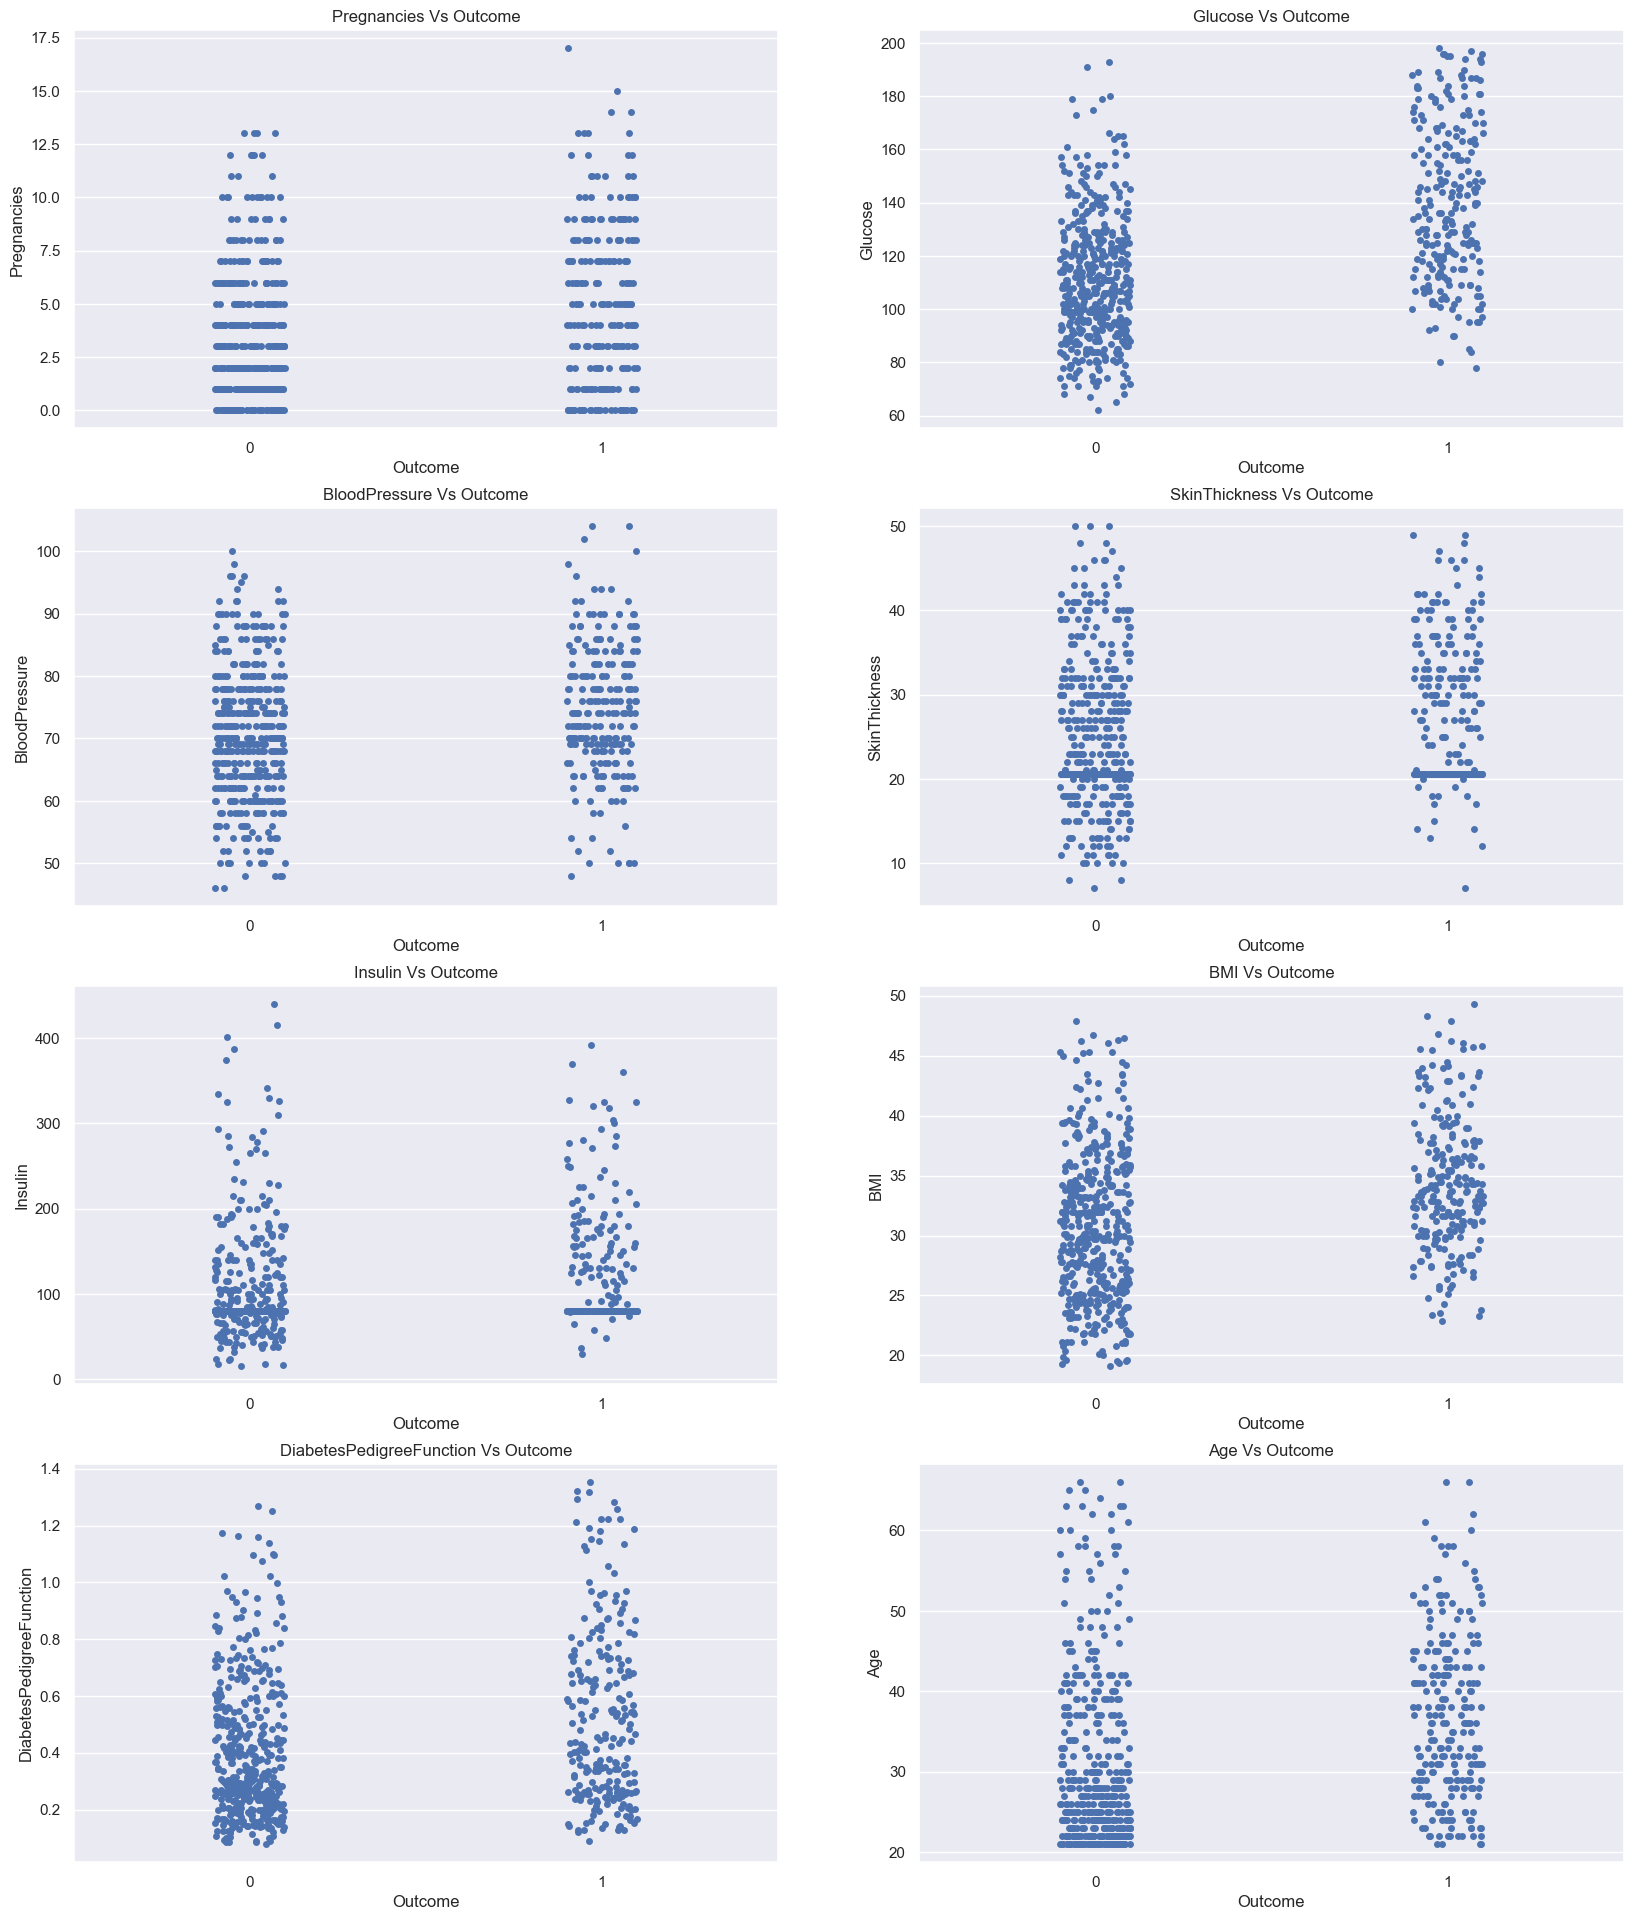

In [71]:
plt.figure(figsize=(20,30))
for i in enumerate(independent_features):
    plt.subplot(5, 2, i[0]+1)
    sns.set(rc={'figure.figsize':(7,5)})
    sns.stripplot(data=data, y=i[1], x='Outcome')
    plt.title(f"{i[1]} Vs Outcome")

2.9 Checking the variation of slope between independent features and dependent feature

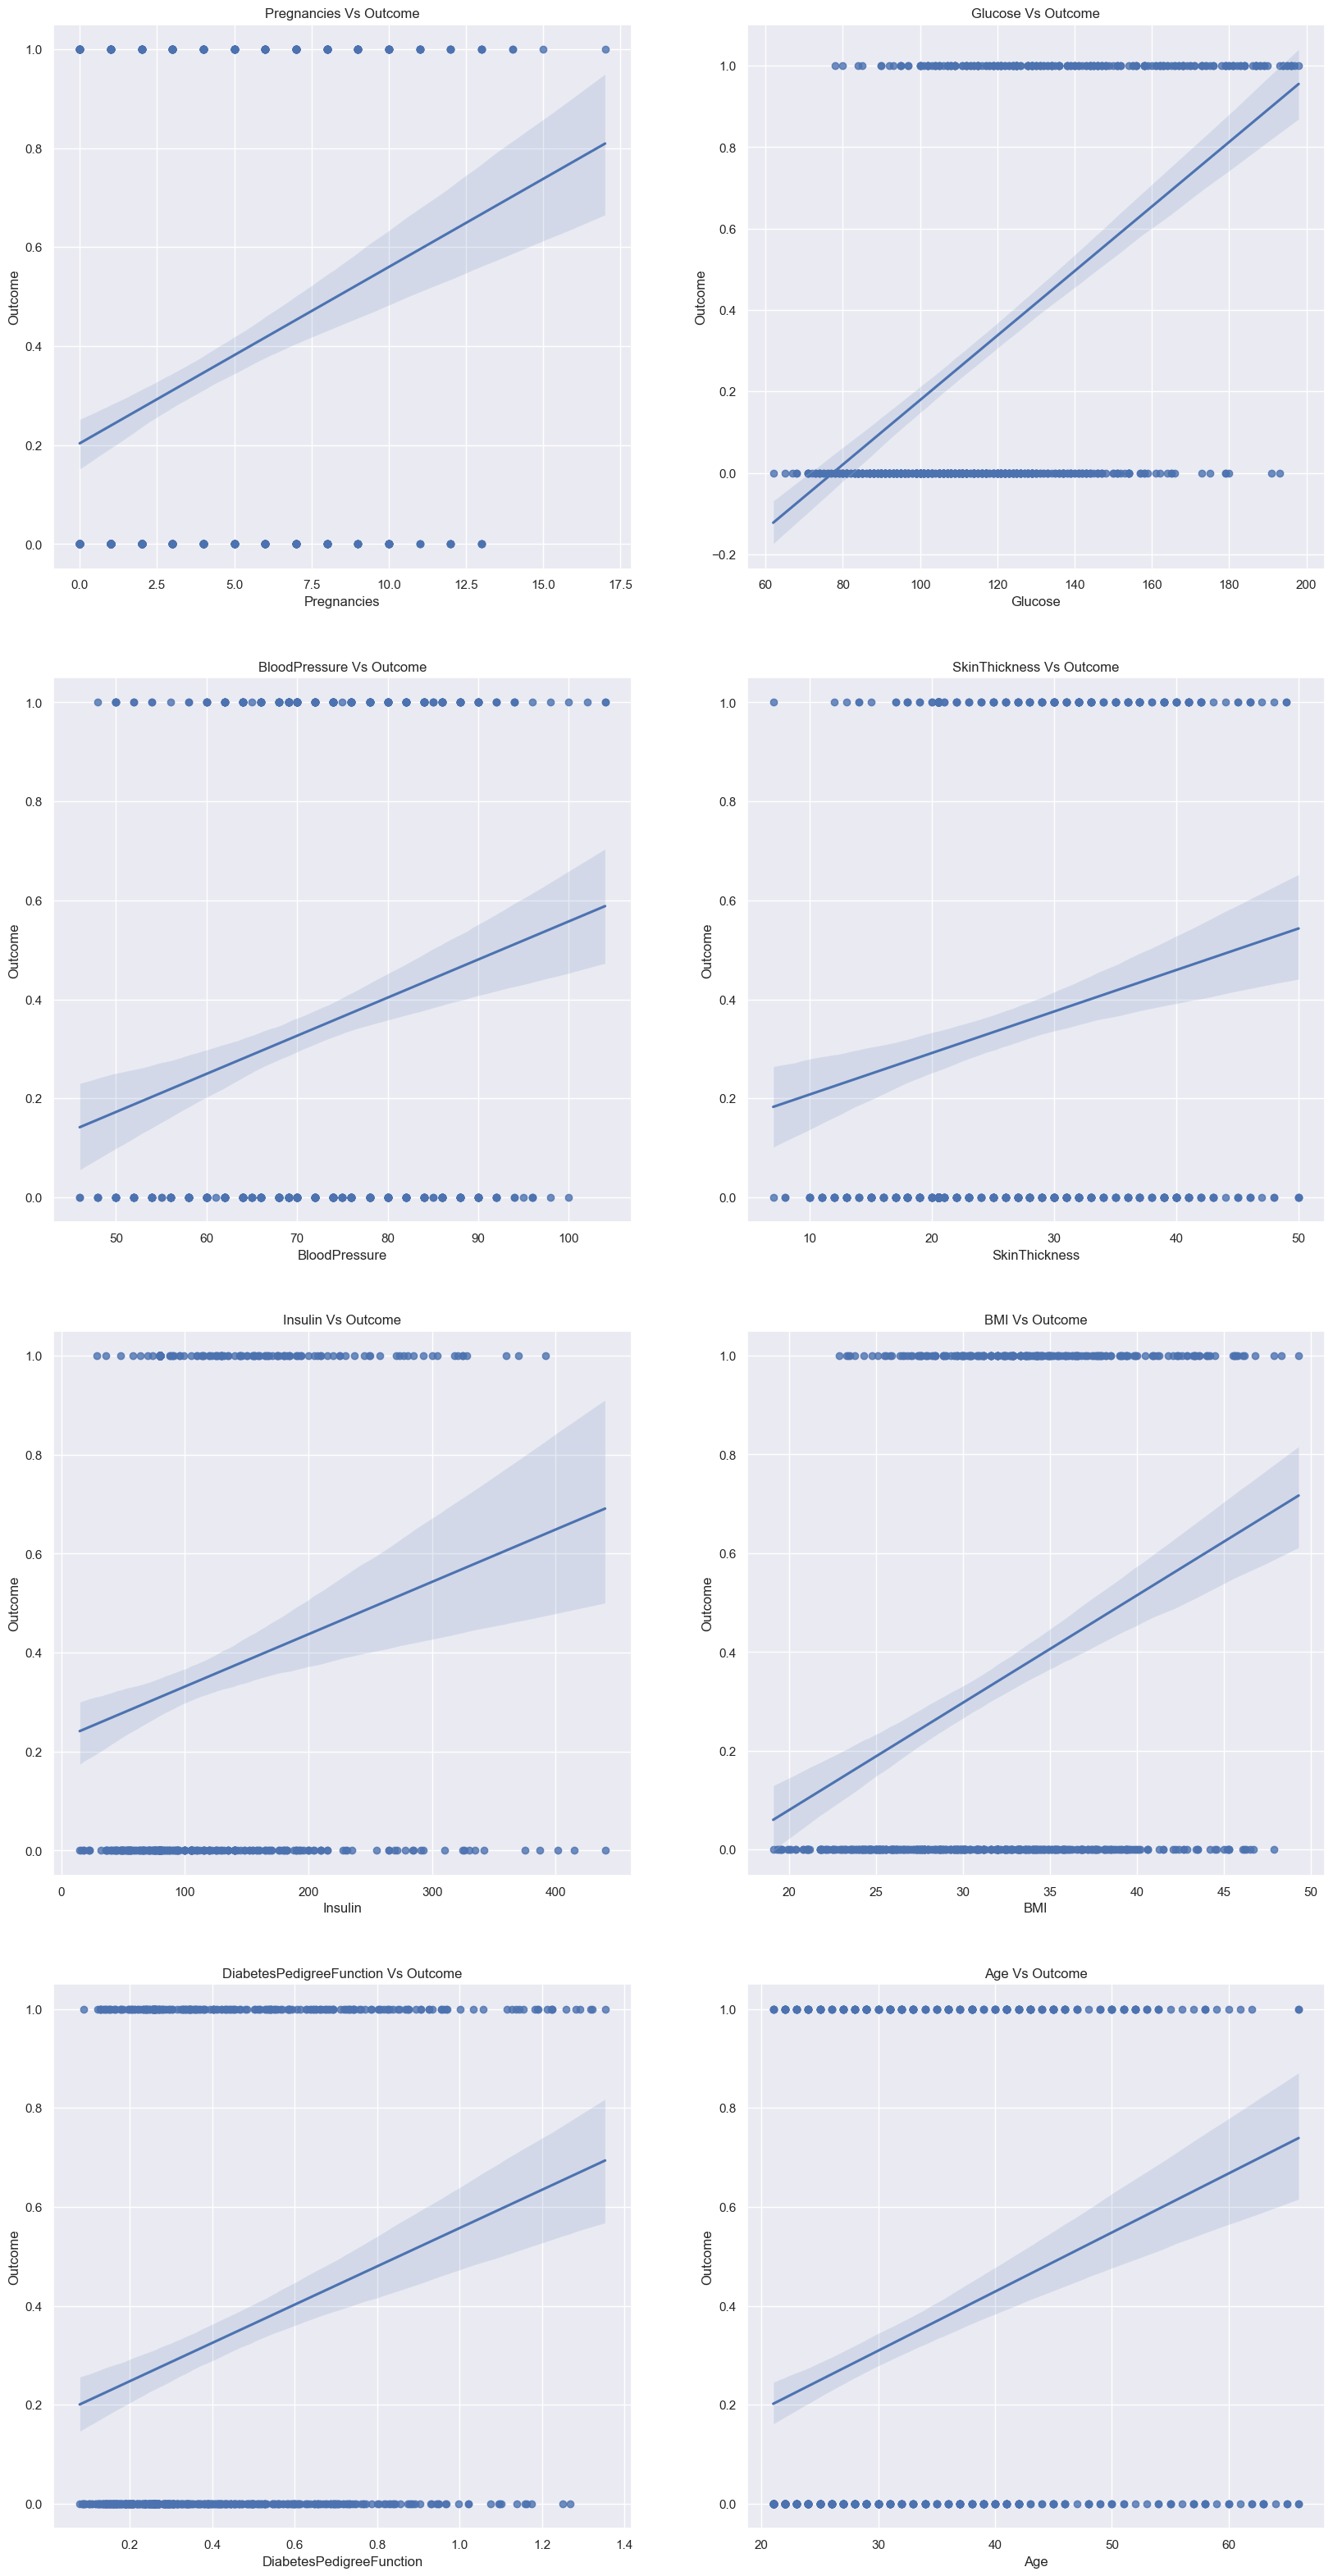

In [72]:
plt.figure(figsize=(20,50))
for i in enumerate(independent_features):
    plt.subplot(5, 2, i[0]+1)
    sns.set(rc={'figure.figsize':(8,10)})
    sns.regplot(x=data[i[1]], y=data['Outcome'])
    plt.xlabel(i[1])
    plt.ylabel("Outcome")
    plt.title("{} Vs Outcome".format(i[1]))

2.10 Checking correlation between independent features and dependent feature

In [73]:
corr=round(data[[feature for feature in data.columns]].corr(),2)
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.00,0.15,0.19,0.07,0.01,0.05,0.03,0.56,0.25
Glucose,0.15,1.00,0.21,0.10,0.38,0.19,0.09,0.30,0.49
BloodPressure,0.19,0.21,1.00,0.15,-0.00,0.27,0.05,0.35,0.17
SkinThickness,0.07,0.10,0.15,1.00,0.26,0.53,0.12,0.04,0.15
Insulin,0.01,0.38,-0.00,0.26,1.00,0.20,0.15,0.04,0.15
BMI,0.05,0.19,0.27,0.53,0.20,1.00,0.14,0.07,0.28
DiabetesPedigreeFunction,0.03,0.09,0.05,0.12,0.15,0.14,1.00,0.06,0.22
Age,0.56,0.30,0.35,0.04,0.04,0.07,0.06,1.00,0.28
Outcome,0.25,0.49,0.17,0.15,0.15,0.28,0.22,0.28,1.00


<Axes: >

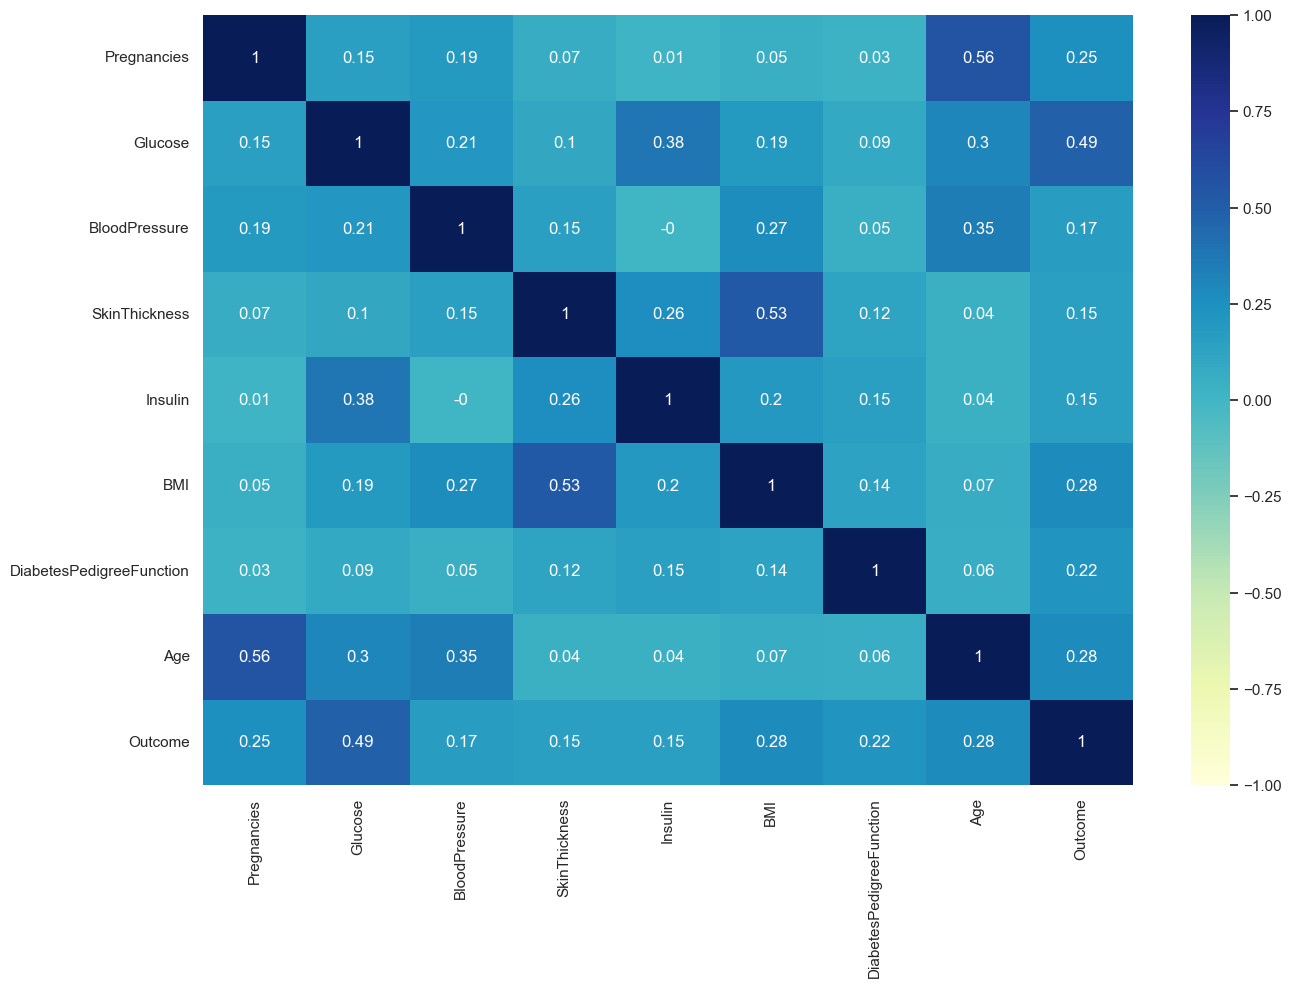

In [74]:
### Plotting heatmap for visualising the correlation between features
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(data=corr, annot=True,cmap="YlGnBu", vmin=-1, vmax=1)

3.0 Model Building

3.1 Getting independent features in dataset(X) and dependent feature in series(y)

In [76]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0


In [77]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30


In [78]:
y.head()

0    1
1    0
2    1
3    0
5    0
Name: Outcome, dtype: int64

3.2 Splitting data into Training and Test data

In [80]:
### random state train test split will be same with all people using random_state=16

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=16)

In [81]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
746,1,147.0,94.0,41.000000,79.799479,49.3,0.358,27
264,4,123.0,62.0,20.536458,79.799479,32.0,0.226,35
340,1,130.0,70.0,13.000000,105.000000,25.9,0.472,22
322,0,124.0,70.0,20.000000,79.799479,27.4,0.254,36
565,2,95.0,54.0,14.000000,88.000000,26.1,0.748,22


In [82]:
y_train.head()

746    1
264    1
340    0
322    1
565    0
Name: Outcome, dtype: int64

In [83]:
X_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
705,6,80.0,80.0,36.000000,79.799479,39.8,0.177,28
728,2,175.0,88.0,20.536458,79.799479,22.9,0.326,22
242,3,139.0,54.0,20.536458,79.799479,25.6,0.402,22
687,1,107.0,50.0,19.000000,79.799479,28.3,0.181,29
638,7,97.0,76.0,32.000000,91.000000,40.9,0.871,32


In [84]:
y_test.head()

705    0
728    0
242    1
687    0
638    1
Name: Outcome, dtype: int64

In [85]:
### both will have same shape
X_train.shape, y_train.shape

((584, 8), (584,))

In [86]:
### both will have same shape
X_test.shape, y_test.shape

((104, 8), (104,))

3.3 Standardisation/ feature scaling the dataset

In [88]:
### Crating a standard scaler object
scaler=StandardScaler()
scaler

StandardScaler()

In [89]:
### using fit_transform to Standardize the train data
X_train=scaler.fit_transform(X_train)

In [90]:
X_train[:5]

array([[-0.86019009,  0.94854966,  2.01983918,  1.7665245 , -0.43888175,
         2.89360233, -0.31591105, -0.51401632],
       [ 0.04169683,  0.1172319 , -0.91556073, -0.62980846, -0.43888175,
         0.016956  , -0.79724224,  0.20241693],
       [-0.86019009,  0.35969958, -0.18171075, -1.51234696, -0.05052878,
        -0.99735282,  0.09978406, -0.9617871 ],
       [-1.16081906,  0.15187014, -0.18171075, -0.6926291 , -0.43888175,
        -0.74793261, -0.69514169,  0.29197108],
       [-0.55956112, -0.85263882, -1.6494107 , -1.39524441, -0.31250751,
        -0.96409679,  1.10620381, -0.9617871 ]])

In [92]:
### here using transform only to avoid data leakage
### (training mean and training std will be used for standardisation when we use transform)
X_test=scaler.transform(X_test)
X_test[:5]

array([[-0.96752823, -4.19080265, -6.53542038, -2.89638065, -1.67539612,
        -5.085526  , -5.17997495, -2.96999087],
       [-1.32903934, -4.07682092, -6.4681034 , -3.10843232, -1.67539612,
        -5.55279551, -3.19878367, -3.01811055],
       [-1.23866156, -4.120014  , -6.75420054, -3.10843232, -1.67539612,
        -5.47814298, -2.18824315, -3.01811055],
       [-1.41941712, -4.15840784, -6.78785903, -3.12950178, -1.67539612,
        -5.40349046, -5.12678861, -2.96197092],
       [-0.87715045, -4.17040592, -6.56907886, -2.95123268, -1.67273617,
        -5.05511201,  4.04785558, -2.93791108]])

# 4.0 Model
1.0 Logistic Regression

In [93]:
### Creating a Logistic regression object
logistic_reg=LogisticRegression()
logistic_reg

LogisticRegression()

In [94]:
### Passing independant and dependant training data to the model
logistic_reg.fit(X_train,y_train)

LogisticRegression()

1.1 Using Above Model to get prediction for test data

In [97]:
logistic_reg_pred=logistic_reg.predict(X_test)
logistic_reg_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [98]:
#performance

confusion_mat=confusion_matrix(y_test, logistic_reg_pred)
confusion_mat

array([[64,  0],
       [40,  0]], dtype=int64)

In [99]:
truly_positive=confusion_mat[0][0]
falsely_positive=confusion_mat[0][1]
falsely_negative=confusion_mat[1][0]
truly_negative=confusion_mat[1][1]

In [100]:
### accuracy using accuracy_score
accuracy=round(accuracy_score(y_test, logistic_reg_pred),4)
accuracy

0.6154

In [101]:
### manual calcualtion for accuracy
accuracy_manual=round(((truly_positive+truly_negative)/(truly_positive+falsely_positive+falsely_negative+truly_negative)),4)
print("Accuracy of our model is {}".format(accuracy_manual))

Accuracy of our model is 0.6154


In [102]:
precision_manual_diabetic=round(truly_positive/(truly_positive+falsely_positive),4)
print("Precision of our model is {}".format(precision_manual_diabetic))

Precision of our model is 1.0


In [103]:
recall_manual_diabetic=round(truly_positive/(truly_positive+falsely_negative),4)
print("Recall of our model is {}".format(recall_manual_diabetic))

Recall of our model is 0.6154


In [104]:
f1_score=2*(precision_manual_diabetic*recall_manual_diabetic)/(precision_manual_diabetic+recall_manual_diabetic)
print("F-1 Score of our model is {} ".format(round(f1_score,4)))

F-1 Score of our model is 0.7619 
